In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# General stuff

def mean(X):
    '''Mean'''
    return sum(X)/len(X)


def D(X):
    '''Variance'''
    N = len(X)
    ax = mean(X)
    return sum((x-ax)**2 for x in X)/(N-1)


def Var(X):
    N = len(X)
    ax = mean(X)
    return sum((x-ax)**2 for x in X)/N


def cov(X, Y):
    '''Covariance of X and Y'''
    N = len(X)
    ax = mean(X) # среднее X
    ay = mean(Y) # среднее Y
    return sum((x-ax)*(y-ay) for x,y in zip(X,Y))/(N-1)


def sd(X):
    '''Standard deviation of X'''
    return D(X)**.5


def r(X,Y):
    '''Correlation coefficient'''
    return cov(X,Y)/(sd(X)*sd(Y))


def normal_distribution(mu, sigma):
    from math import exp, pi
    def f(x):
        return exp(-(x-mu)**2/(2*sigma**2))/(sigma*(2*pi)**.5)
    return f


# Plotting stuff

def new_ax(xlabel = '', ylabel = '', equal=True):
    fig = plt.figure(figsize=(7, 9))
    ax = fig.add_subplot()
    if equal:
        ax.set_aspect('equal')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax


def plot_func(func, a, b, ax=None):
    ax = ax if ax else new_ax('X','Y')
    X = np.linspace(a, b)
    ax.plot(X,[func(x) for x in X])

    
# Linear regression stuff

def linear_regression(X,Y):
    b1 = sd(Y)/sd(X) * r(X,Y)
    b0 = mean(Y) - b1*mean(X)
    return b0, b1    


def get_residuals(X,Y):
    b0, b1 = linear_regression(X,Y)
    res = []
    for x,y in zip(X,Y):
        y0 = b0+b1*x
        res.append(y-y0)
    return res


def linear_regression_se(X,Y):
    '''Std. Error for linear regression coeffs'''
    E = get_residuals(X,Y)
    n = len(E)
    m = mean(X)
    s2 = sum(e**2 for e in E)/(n-2)
    se_b0 = (s2*(1+m**2/Var(X))/n)**.5 
    se_b1 = (s2/sum((x-m)**2 for x in X))**.5
    return se_b0, se_b1


def plot_regression(X,Y, ax=None):
    b0, b1 = linear_regression(X,Y)
    plot_func(lambda x: b0+b1*x, min(X), max(X), ax)
    return ax

In [14]:
def linear_analysis(X,Y, xlabel='X', ylabel='Y'):

    ax = new_ax(xlabel,ylabel)
    ax.plot(X,Y,'.')

    ax = plot_regression(X,Y, ax)
    ax.set_title('Linear Regression')

    ax = new_ax('Fitted values', 'Residuals', False)
    ax.scatter(Y, get_residuals(X,Y))
    ax.set_title('Fitted values vs. Residuals')

    ax = new_ax('Residual', 'Density', False)

    residuals = get_residuals(X,Y)
    ax.hist(residuals, density=True)
    ax.set_title('Residuals histogram')

    sigma = sd(residuals)
    mu = mean(residuals)
    plot_func(normal_distribution(mu, sigma), mu-4*sigma, mu+4*sigma, ax)
    

    results = pd.DataFrame([], ['b_0', 'b_1'], ['Estimate','Std. error','t value', 'Pr(>|t|)'])

    b0, b1 = linear_regression(X,Y)
    se_b0, se_b1 = linear_regression_se(X,Y)
    
    results.loc['b_0', 'Std. error'] = se_b0
    results.loc['b_1', 'Std. error'] = se_b1
    results.loc['b_0', 'Estimate'] = b0
    results.loc['b_1', 'Estimate'] = b1
        
    return results
    


,Estimate,Std. error,t value,Pr(>|t|)
b_0,64.781,6.8026,NaN,NaN
b_1,-0.621217,0.0790165,NaN,NaN


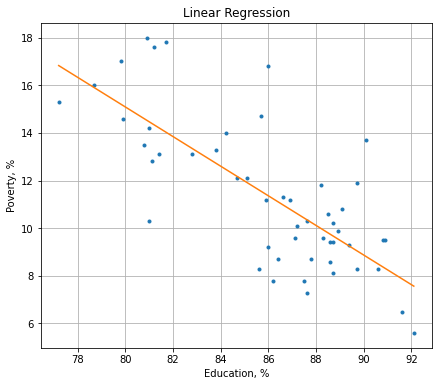

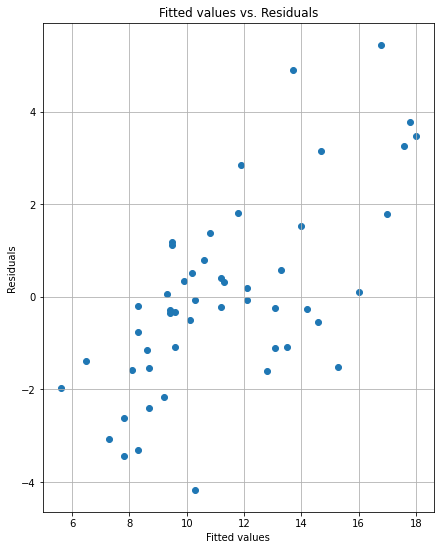

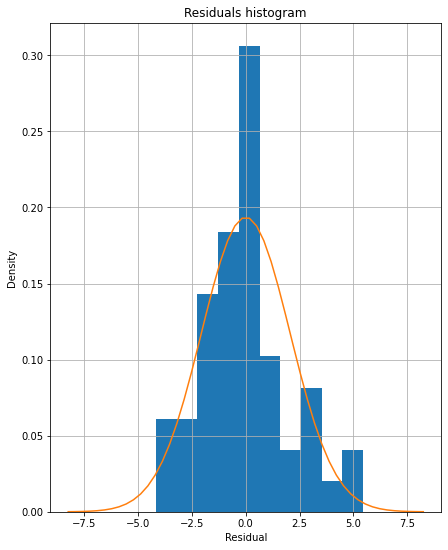

In [15]:
df = pd.read_csv('data/states.csv')
linear_analysis(df['hs_grad'], df['poverty'], 'Education, %', 'Poverty, %')